In [255]:
# Import of packages
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [256]:
def kernel(x, y, typeKer = "linear", p = 4, sigma = 0.5, kappa = 0.1, delta = 0.2):
    if typeKer == "linear":
        k = np.dot(x,y) + 1
    elif typeKer == "poly":
        k = (np.dot(x,y) + 1) ** p
    elif typeKer == "radial":
        k = math.exp(-(np.dot(x-y,x-y))/(2*sigma))
    elif typeKer == "sigmoid":
        k = math.atanh(kappa * np.dot(x,y) - delta)

    return k

In [257]:
def lagrange(params, eps, X, t, K):
    N2 = np.shape(params)[0]
    N = int(N2/2)
    a = params[0:N].reshape((N,1))
    a_hat = params[N:N2].reshape((N,1))
    t = t.reshape((N,1))
    L = (1/2) * (a - a_hat).T.dot(K).dot(a - a_hat) + eps * np.sum(a + a_hat) - (a - a_hat).T.dot(t)
    return L   

In [258]:
N = 50
tr = 0.6
ts = 0.4
N_tr = int(N*tr)
N_ts = int(N*ts)
x = np.linspace(0,5,num=N)
y = 3 * x + 2 + np.random.normal(loc=0, scale=1, size=N)
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_ts = x[N_ts:N]
y_ts = y[N_ts:N]

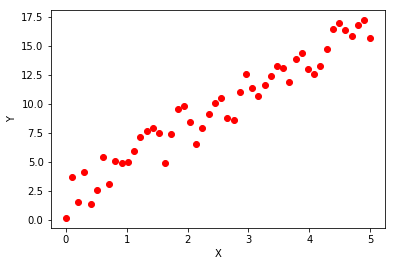

In [259]:
plt.plot(x,y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [260]:
eps = 0.5
C = 5
initial = np.zeros(2*N_tr)
K = np.zeros((N_tr,N_tr))
for i in range(N_tr):
    for j in range(N_tr):
        K[i,j] = kernel(x_tr[i],x_tr[j])
args = (eps, x_tr, y_tr, K)
bounds = []
for i in range(0,2*N_tr):
    bounds.append((0,C))
final = optimize.minimize(lagrange, initial, args, bounds=bounds, method='SLSQP')
a = final.x[0:N_tr]
a_hat = final.x[N_tr:2*N_tr]
for i in range(0,N_tr):
    if (a[i] < C and a[i] > 0):
        tn = y_tr[i]
        ind = i
        break
b = tn - eps - (a - a_hat).T.dot(K)[ind]
cond_valuable = (a - a_hat) > 1e-15
a = a[cond_valuable]
a_hat = a_hat[cond_valuable]
x_sv = x_tr[cond_valuable]
print(a)
print(a_hat)

[  5.00000000e+00   5.00000000e+00   5.00000000e+00   1.10603257e+00
   1.12949870e-13   5.00000000e+00   5.00000000e+00   5.00000000e+00
   5.00000000e+00   1.14646194e-13   5.00000000e+00   5.00000000e+00
   1.13859726e-13   1.35570443e-13   8.77290494e-01   1.18514806e-13
   5.00000000e+00]
[  1.93725879e-13   1.74778759e-13   1.93901572e-13   1.14838012e-13
   0.00000000e+00   1.78348828e-13   1.89782721e-13   1.92224232e-13
   1.26631032e-13   6.33001150e-14   2.15519888e-13   2.06915730e-13
   6.56769305e-14   3.42958381e-14   1.02393054e-13   6.41708908e-14
   1.63424829e-13]


In [261]:
def pred(a, a_hat, b, x_sv, x_ts, kernel):
    N_sv = np.shape(a)[0]
    N_ts = np.shape(x_ts)[0]
    a = a.reshape(N_sv,1)
    a_hat = a_hat.reshape(N_sv,1)
    print(N_sv)
    print(N_ts)
    print(np.shape((a-a_hat).T))
    K = np.zeros((N_sv, N_ts))
    print(np.shape(K))
    for i in range(N_sv):
        for j in range(N_ts):
            K[i,j] = kernel(x_sv[i],x_ts[j])
    y_ts = (a - a_hat).T.dot(K) + b
    y_ts = y_ts.reshape(-1)
    return y_ts
    
    

In [262]:
y_pred = pred(a, a_hat, b, x_sv, x_ts, kernel)

17
30
(1, 17)
(17, 30)


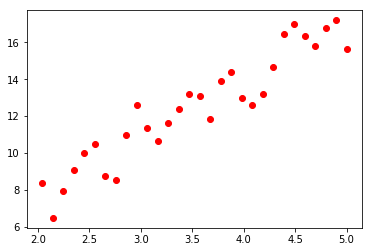

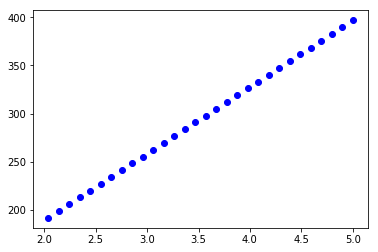

In [264]:
plt.plot(x_ts, y_ts,'ro')
plt.show()
plt.plot(x_ts, y_pred, 'bo')
plt.show()

In [266]:
(y_pred[N_ts]-y_pred[0]) / (x_ts[N_ts] - x_ts[0])

69.467400292385292